In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import birdfruit as bf

In [2]:
# load data and drop any empty columns

file = 'stats/Birdfruit2021-stats.csv'
df = pd.read_csv(file).dropna(axis=1, how='all')

In [3]:
# clean data

# collapse lines into a single column
lines = ['Player 0','Player 1','Player 2','Player 3', 'Player 4', 'Player 5', 'Player 6']
df['line'] = df[lines].values.tolist()
df = df.drop(lines, axis=1)

# prepare for line tags 
df['line_type'] = 'nan'
df['handler_maj'] = 'nan'
df['cutter_maj'] = 'nan'
df['falcon_points'] = 'nan'
df['ff_points'] = 'nan'
df['pp_points'] = 'nan'
df['fp_points'] = 'nan'
df['pf_points'] = 'nan'

# process line tags
df = bf.falcon_or_pear(df)
df = bf.who_handles(df)
df = bf.tally_points(df)

In [5]:
# separate events 
practices = df.where(df.Tournamemnt == 'Practice').dropna(axis=0, how='all')
practices = bf.tally_points(practices)
tournaments = df.where(df.Tournamemnt.isin(['Round Robin', 'SMUT'])).dropna(axis=0, how='all')
tournaments = bf.tally_points(tournaments)

## Passing Percentages

### By Matchup

In [6]:
Mixtape = tournaments.where(tournaments.Opponent == 'Mixtape').where(tournaments.Tournamemnt == 'SMUT').dropna(axis=0, how='all')
Mixtape_rr = tournaments.where(tournaments.Opponent == 'Mixtape').where(tournaments.Tournamemnt == 'Round Robin').dropna(axis=0, how='all')
Lochsa = tournaments.where(tournaments.Opponent == 'Lochsa').dropna(axis=0, how='all')
Bulleit = tournaments.where(tournaments.Opponent == 'Bulleit Train').dropna(axis=0, how='all')
Admin = tournaments.where(tournaments.Opponent == 'Administrators').dropna(axis=0, how='all')
Igneous = tournaments.where(tournaments.Opponent == 'Igneous').dropna(axis=0, how='all')
Squid = tournaments.where(tournaments.Opponent == 'Squid Inc').dropna(axis=0, how='all')
BFG = tournaments.where(tournaments.Opponent == 'BFG').dropna(axis=0, how='all')
LightsOut = tournaments.where(tournaments.Opponent == 'Lights Out').dropna(axis=0, how='all')
Sorta = tournaments.where(tournaments.Opponent == 'Sorta').dropna(axis=0, how='all')

In [7]:
tournament_points = (Mixtape['Our Score - End of Point'].iloc[-1] + Mixtape['Their Score - End of Point'].iloc[-1]) + (Lochsa['Our Score - End of Point'].iloc[-1] + Lochsa['Their Score - End of Point'].iloc[-1]) + (Bulleit['Our Score - End of Point'].iloc[-1] + Bulleit['Their Score - End of Point'].iloc[-1])  + (Admin['Our Score - End of Point'].iloc[-1] + Admin['Their Score - End of Point'].iloc[-1]) + (Igneous['Our Score - End of Point'].iloc[-1] + Igneous['Their Score - End of Point'].iloc[-1]) + (Squid['Our Score - End of Point'].iloc[-1] + Squid['Their Score - End of Point'].iloc[-1]) + (BFG['Our Score - End of Point'].iloc[-1] + BFG['Their Score - End of Point'].iloc[-1]) + (Mixtape_rr['Our Score - End of Point'].iloc[-1] + Mixtape_rr['Their Score - End of Point'].iloc[-1]) + (LightsOut['Our Score - End of Point'].iloc[-1] + LightsOut['Their Score - End of Point'].iloc[-1]) + (Sorta['Our Score - End of Point'].iloc[-1] + Sorta['Their Score - End of Point'].iloc[-1]) 
tournament_points  

209.0

In [8]:
practice_points = practices['Their Score - End of Point'].iloc[-1] + practices['Our Score - End of Point'].iloc[-1]
practice_points

17.0

In [9]:
all_points = practice_points + tournament_points
all_points

226.0

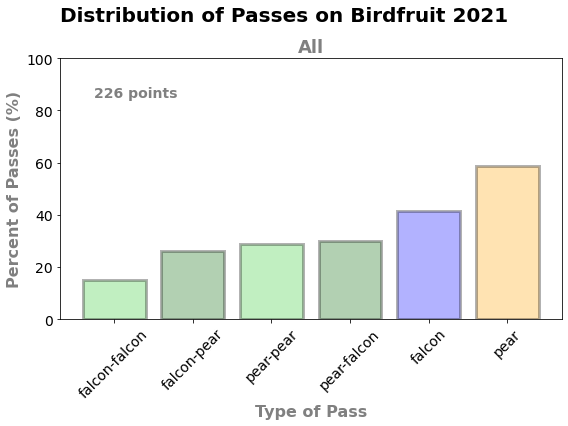

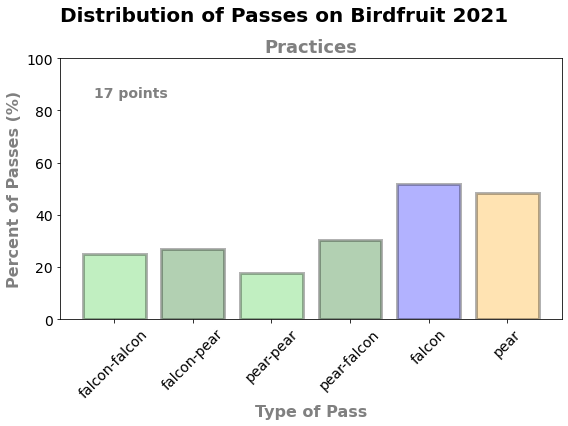

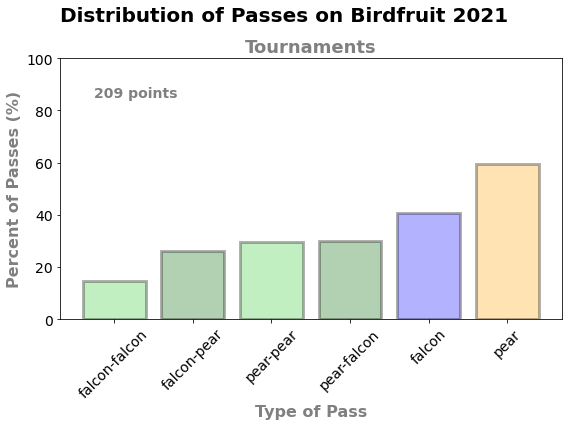

In [10]:
bf.calculate_passes(df, 'All', all_points)
bf.calculate_passes(practices, 'Practices', practice_points)
bf.calculate_passes(tournaments, 'Tournaments', tournament_points)

### By Line Ratio

In [11]:
falcon_lines = df.where(df.line_type == 'falcon').dropna(axis = 0, how='all')
pear_lines = df.where(df.line_type == 'pear').dropna(axis = 0, how='all')

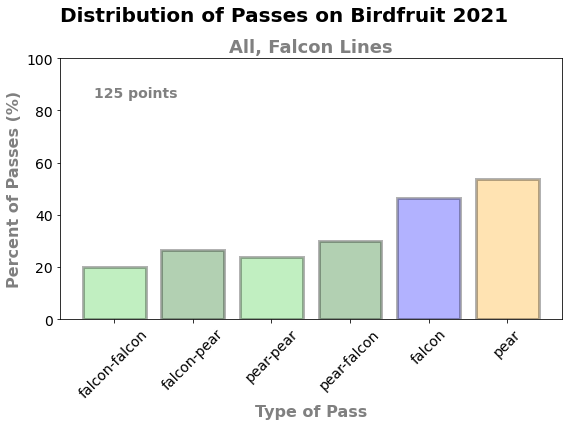

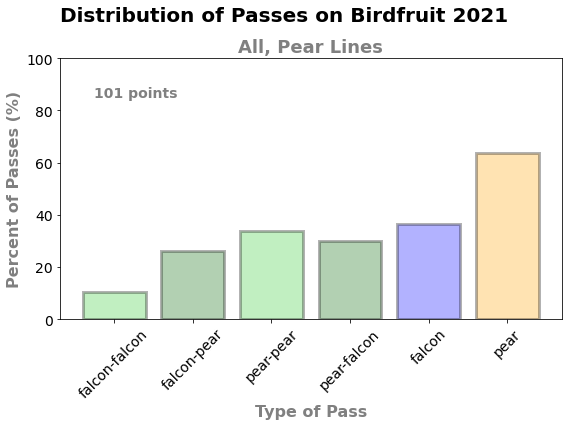

In [12]:
# all events
bf.calculate_passes(falcon_lines, 'All, Falcon Lines', df.falcon_points.tail().values[-1])
bf.calculate_passes(pear_lines, 'All, Pear Lines', all_points - df.falcon_points.tail().values[-1])

In [13]:
t_falcon_lines = tournaments.where(tournaments.line_type == 'falcon').dropna(axis = 0, how='all')
t_pear_lines = tournaments.where(tournaments.line_type == 'pear').dropna(axis = 0, how='all')

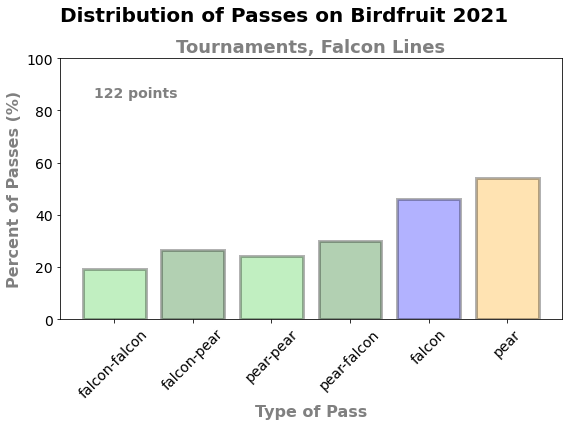

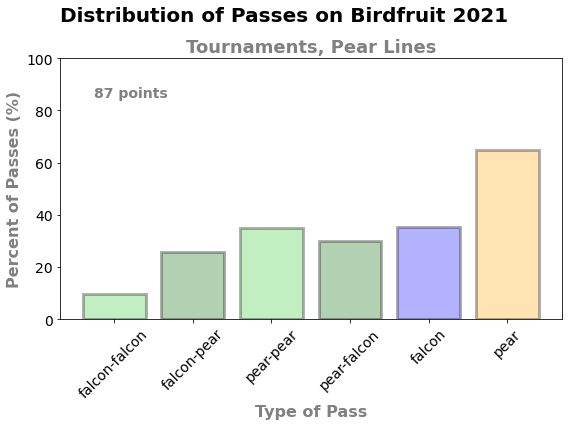

In [14]:
bf.calculate_passes(t_falcon_lines, 'Tournaments, Falcon Lines', tournaments.falcon_points.tail().values[-1])
bf.calculate_passes(t_pear_lines, 'Tournaments, Pear Lines',tournament_points - tournaments.falcon_points.tail().values[-1])

In [15]:
p_falcon_lines = practices.where(practices.line_type == 'falcon').dropna(axis=0, how='all')
p_pear_lines = practices.where(practices.line_type == 'pear').dropna(axis=0, how='all')

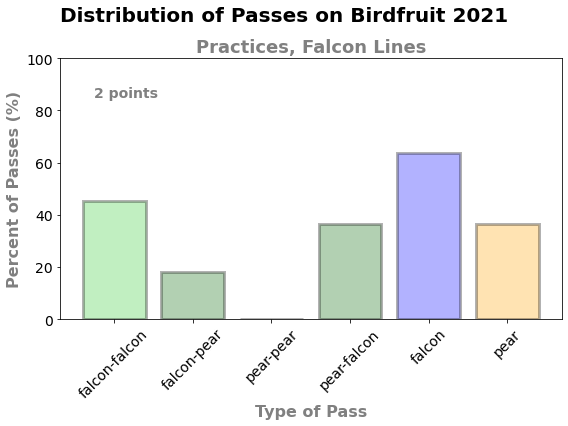

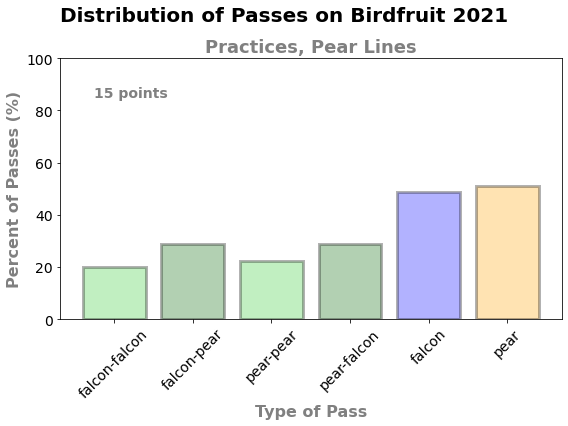

In [16]:
bf.calculate_passes(p_falcon_lines, 'Practices, Falcon Lines', practices.falcon_points.tail().values[-1])
bf.calculate_passes(p_pear_lines, 'Practices, Pear Lines',practice_points - practices.falcon_points.tail().values[-1])

### By Field Position and Line Ratio

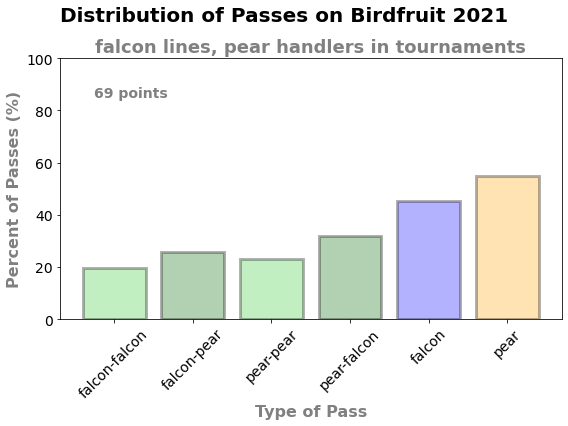

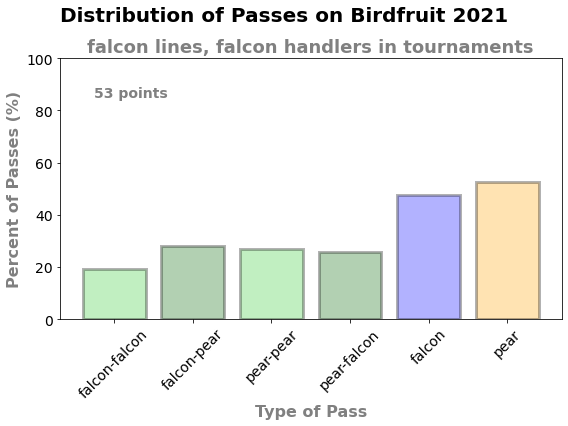

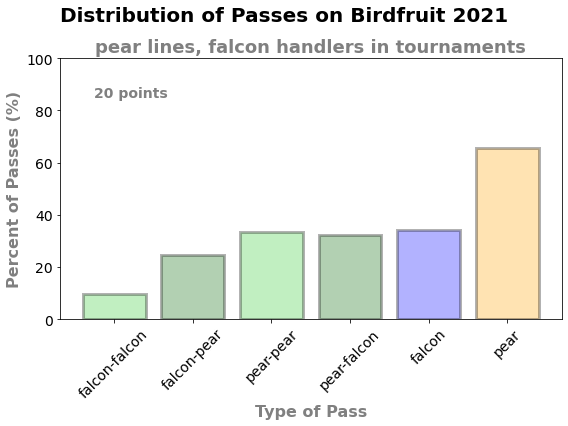

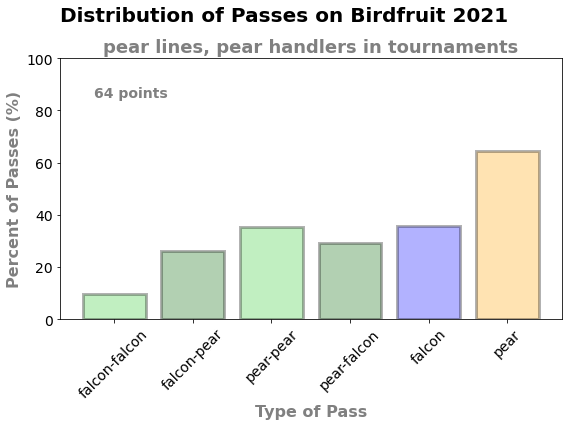

In [20]:
bf.calculate_passes(t_falcon_lines.where(t_falcon_lines.handler_maj == 'pear').dropna(axis=0, how='all'), 'falcon lines, pear handlers in tournaments', tournaments.fp_points.tail().values[-1])
bf.calculate_passes(t_falcon_lines.where(t_falcon_lines.handler_maj == 'falcon').dropna(axis=0, how='all'), 'falcon lines, falcon handlers in tournaments', tournaments.ff_points.tail().values[-1])
bf.calculate_passes(t_pear_lines.where(t_pear_lines.handler_maj =='falcon').dropna(axis=0, how='all'), 'pear lines, falcon handlers in tournaments', tournaments.pf_points.tail().values[-1])
bf.calculate_passes(t_pear_lines.where(t_pear_lines.handler_maj =='pear').dropna(axis=0, how='all'), 'pear lines, pear handlers in tournaments', tournaments.pp_points.tail().values[-1])

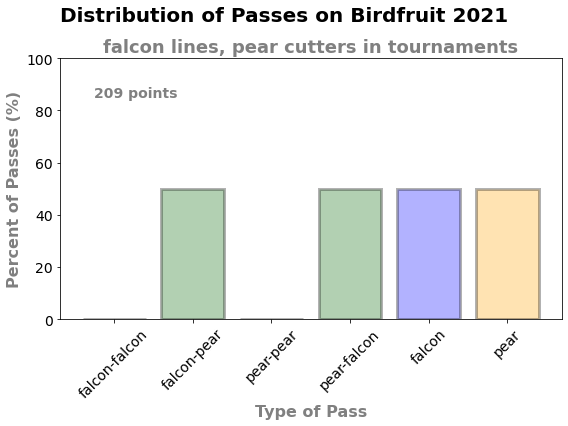

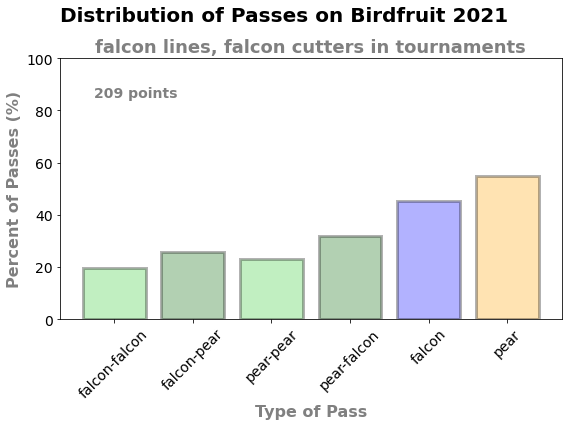

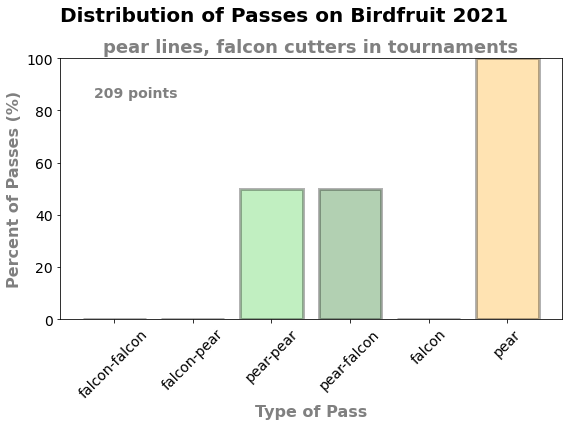

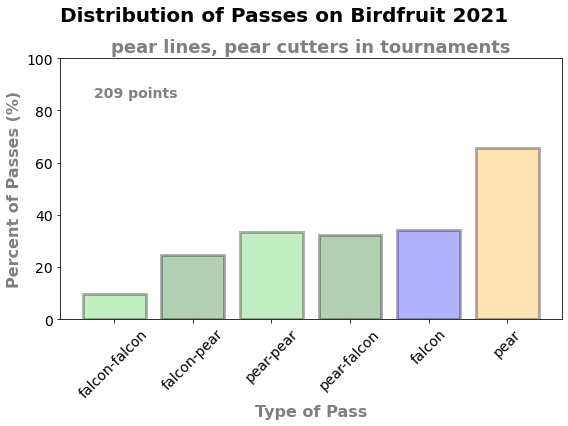

In [19]:
bf.calculate_passes(t_falcon_lines.where(t_falcon_lines.cutter_maj == 'pear').dropna(axis=0, how='all'), 'falcon lines, pear cutters in tournaments', tournament_points)
bf.calculate_passes(t_falcon_lines.where(t_falcon_lines.cutter_maj == 'falcon').dropna(axis=0, how='all'), 'falcon lines, falcon cutters in tournaments', tournament_points)
bf.calculate_passes(t_pear_lines.where(t_pear_lines.cutter_maj =='falcon').dropna(axis=0, how='all'), 'pear lines, falcon cutters in tournaments', tournament_points)
bf.calculate_passes(t_pear_lines.where(t_pear_lines.cutter_maj =='pear').dropna(axis=0, how='all'), 'pear lines, pear cutters in tournaments', tournament_points)

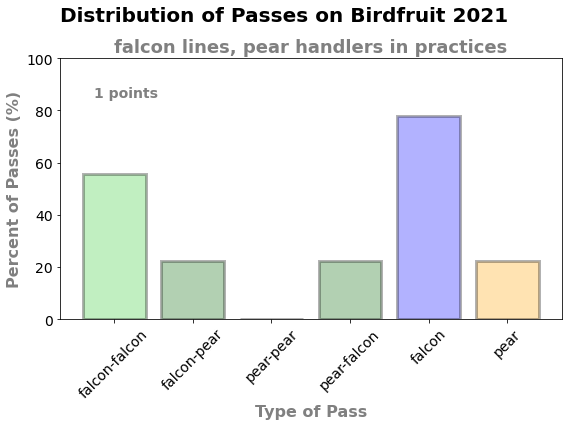

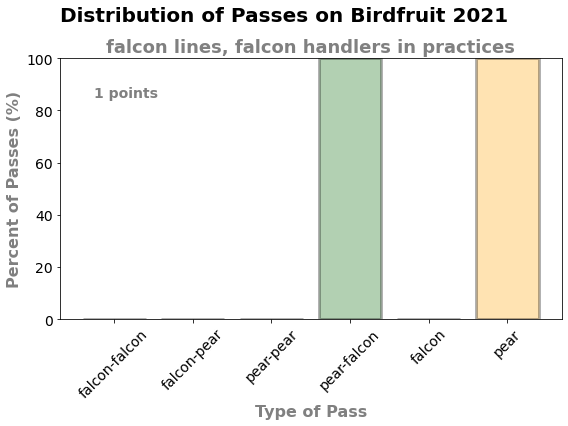

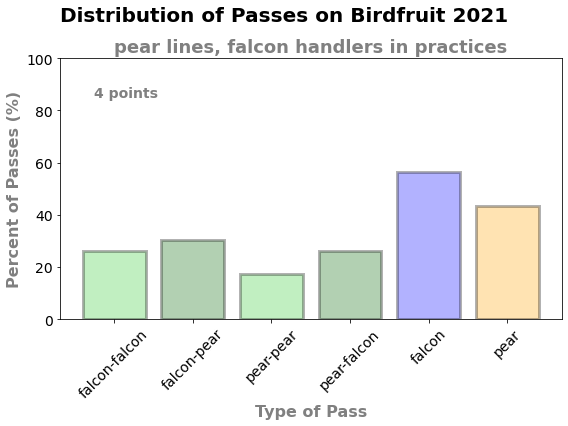

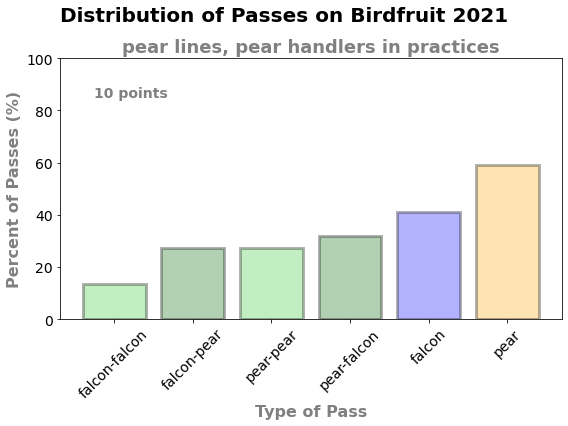

In [21]:
bf.calculate_passes(p_falcon_lines.where(p_falcon_lines.handler_maj == 'pear').dropna(axis=0, how='all'), 'falcon lines, pear handlers in practices',practices.fp_points.tail().values[-1])
bf.calculate_passes(p_falcon_lines.where(p_falcon_lines.handler_maj == 'falcon').dropna(axis=0, how='all'), 'falcon lines, falcon handlers in practices', practices.ff_points.tail().values[-1])
bf.calculate_passes(p_pear_lines.where(p_pear_lines.handler_maj =='falcon').dropna(axis=0, how='all'), 'pear lines, falcon handlers in practices', practices.pf_points.tail().values[-1])
bf.calculate_passes(p_pear_lines.where(p_pear_lines.handler_maj =='pear').dropna(axis=0, how='all'), 'pear lines, pear handlers in practices', practices.pp_points.tail().values[-1])

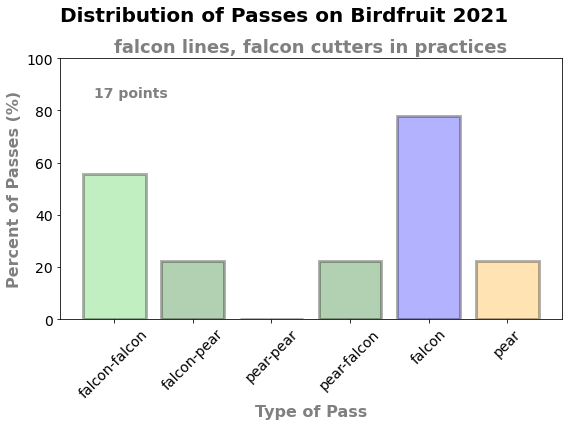

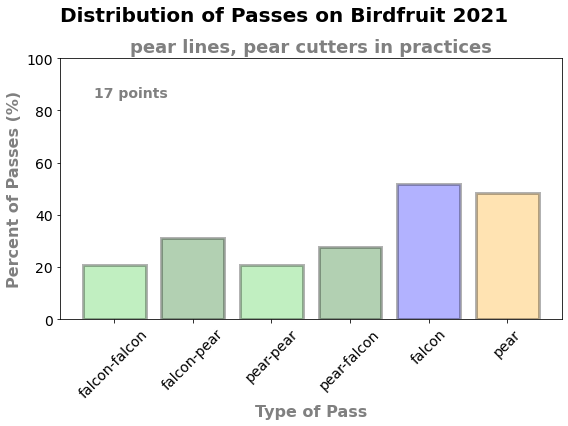

In [20]:
# bf.calculate_passes(p_falcon_lines.where(p_falcon_lines.cutter_maj == 'pear').dropna(axis=0, how='all'), 'falcon lines, pear cutters in practices', tournament_points)
bf.calculate_passes(p_falcon_lines.where(p_falcon_lines.cutter_maj == 'falcon').dropna(axis=0, how='all'), 'falcon lines, falcon cutters in practices', practice_points)
# bf.calculate_passes(p_pear_lines.where(p_pear_lines.cutter_maj =='falcon').dropna(axis=0, how='all'), 'pear lines, falcon cutters in practices')
bf.calculate_passes(p_pear_lines.where(p_pear_lines.cutter_maj =='pear').dropna(axis=0, how='all'), 'pear lines, pear cutters in practices', practice_points)